Benchmark
=========
----------------------


We assessed the performance of two main functions of stmetrics: `get_metrics` and `sits2metrics`. For that, we used a core i7-8700 CPU @ 3.2 GHz and 16GB of RAM. With this test, we wanted to assess the performance of the package to compute the metrics available under different scenarios.

We compared the time and memory performance of those functions using different approaches. For `get_metrics` function, we assessed the performance using a random time series, created with NumPy, with different lengths. For the `sits2metrics` function, we used images with different dimensions in columns and rows, maintaining the same length. 

Install stmetrics
-----------------------
!pip install git+https://github.com/brazil-data-cube/stmetrics.git

`get_metrics`
--------------------

To evaluate the performance of `get_metrics` function, we implemented a simple test using a random time series built with `NumPy` package, using the following code.

In [1]:
import time
from stmetrics import metrics
import numpy
import matplotlib.pyplot as plt

The `get_metrics` function was designed to be used for compute the metrics of one time series. The stmetrics is currently composed by 4 modules:

*   Metrics - With some functions to compute the all metrics available
*   Basics  - That has the implementation of the basics metrics
*   Polar   - That has the implementation of the polar metrics proposed by Körting (2013).
*   Fractal - That has the implementatio of fractal metrics that are currently under assessment.

Along with the metrics, `get_metrics` function also returns the polar plot of the inpute time series.

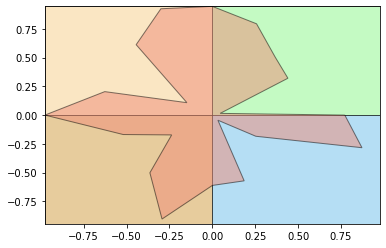

{'basics': {'max_ts': 0.9759792296756558,
  'min_ts': 0.04808538721672284,
  'mean_ts': 0.6109056388733799,
  'std_ts': 0.29056364848092775,
  'sum_ts': 12.218112777467597,
  'amplitude_ts': 0.9278938424589329,
  'mse_ts': 9.152658668516812,
  'fslope_ts': 0.7243171421102885,
  'skew_ts': -0.54738857482128,
  'amd_ts': 0.3327714629554783,
  'abs_sum_ts': 12.218112777467597,
  'iqr_ts': 0.36797126163222327,
  'fqr_ts': 0.42877007608749085,
  'tqr_ts': 0.8754980682995873,
  'sqr_ts': 0.6213153669212852},
 'polar': {'ecc_metric': 0.9751625623899488,
  'gyration_radius': 0.832372517625857,
  'area_ts': 1.192937763415025,
  'polar_balance': 0.06548526239149761,
  'angle': 3.306939635357677,
  'area_q1': 0.3946454162385842,
  'area_q2': 0.2641239104991063,
  'area_q3': 0.3158387113661037,
  'area_q4': 0.21832972531123107,
  'shape_index': 4.293564433772728,
  'fill_rate': 0.8128851173945503,
  'fill_rate2': 0.4292998579836149,
  'symmetry_ts': 5.302775225959127},
 'fractal': {'dfa_fd': 0.301

In [2]:
metrics.get_metrics(numpy.random.rand(1,20)[0], show = True)

In [3]:
tempos = []
for i in range(5,1000):
    start = time.time()
    metrics.get_metrics(numpy.random.rand(1,i)[0])
    end = time.time()
    tempos.append(end - start)

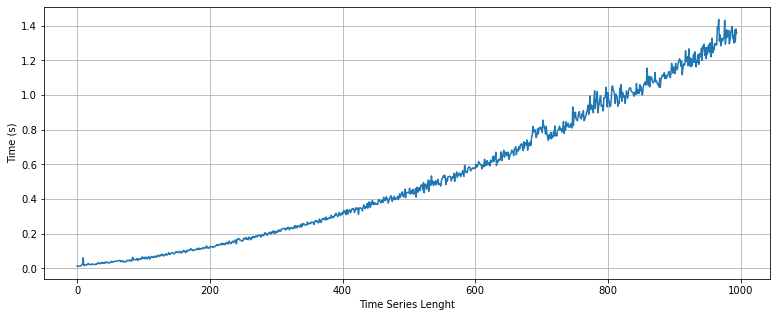

In [4]:
figure = plt.figure(figsize=(13,5))
plt.plot(tempos)
plt.ylabel('Time (s)')
plt.xlabel('Time Series Lenght')
plt.grid()
plt.show()

As shown above, the `get_metrics` function presents a quadratic response regarding the length of the time series. It is able to compute the metrics for a time series with 1,000 data points in less than **two second**. This beahaviour is explained by some polar metrics that requires more computational time, for example the `symmetry_ts` function. For the following versions, we will try to improve the performance of the package.

`sits2metrics`
-------------------

To evaluate the `sits2metrics` function we used a sample image with the following dimensions: 249x394 and 12 dates. With this test, we aim to assess how the size of the image impacts the total time to compute the metrics. 

This function uses the multiprocessing library to speed up the process. According to the previous test, a time series with 12 dates as our sample requires 0.015s to compute the metrics for one pixel, therefore using a single core this should require 1,318s or approximately 21minutes. With the parallel implementation, according to our tests, the package performs the same task in 6 minutes.

In [5]:
import rasterio

In [6]:
sits = rasterio.open('https://github.com/tkorting/remote-sensing-images/blob/master/evi_corte.tif?raw=true').read()

In [7]:
tempos_sits = []
dim         = []

for i in range(10,210,10):
    dim.append(str(i)+'x'+str(i))
    start = time.time()
    metrics.sits2metrics(sits[:,:i,:i])
    end = time.time()
    tempos_sits.append(end - start)

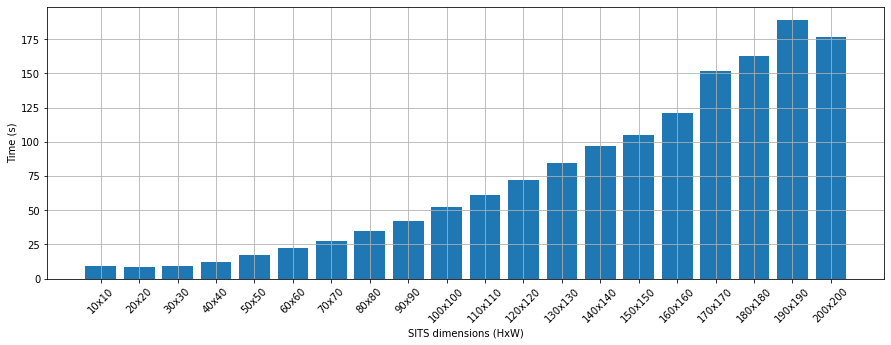

In [8]:
fig = plt.figure(figsize=(15,5))
plt.bar(dim, tempos_sits)
plt.ylabel('Time (s)')
plt.xlabel('SITS dimensions (HxW)')
plt.xticks(rotation=45)
plt.grid()
plt.show()